In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('dark_background')

In [3]:
def create_l_system(iters, axiom, rules):
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    for _ in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string

In [4]:
def sierpinski_arrowhead(iters):
    if iters % 2 == 0:
        axiom = 'XF'
    if iters % 2 == 1:
        axiom = '+XF'
    rules = {"X":"YF-XF-Y", "Y":"XF+YF+X"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j)/2**iters
    p = points[0]
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(60) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(60) * 1j)
    x, y = points.real, points.imag
    return x - 0.5, y - 0.5/3**0.5

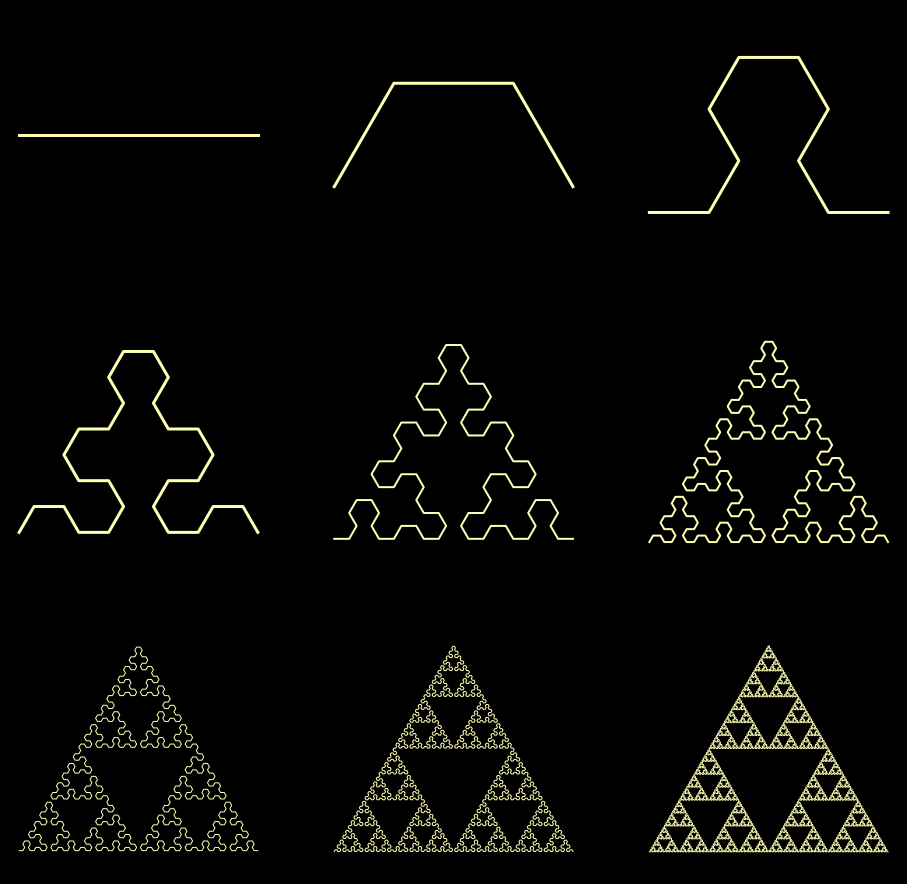

In [5]:
plt.figure(figsize=(16, 16))
for iters in range(9):
    x, y = sierpinski_arrowhead(iters)
    plt.subplot(3, 3, iters + 1)
    if iters <= 3:
        plt.plot(x, y, lw = 3)
    if 3 < iters <= 5:
        plt.plot(x, y, lw = 2)
    if iters > 5:
        plt.plot(x, y, lw = 1)
    plt.axis('equal')
    plt.axis('off')
# plt.savefig('sierpinski-curve.svg')
plt.show()

In [6]:
def sierpinski_triangle(iters):
    axiom = '-FXF--FF--FF'
    rules = {"X":"--FXF++FXF++FXF--", "F":"FF"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j)/2**iters
    p = points[0]
    
    angle = 60
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    return x - 0.5, y - 0.5/3**0.5

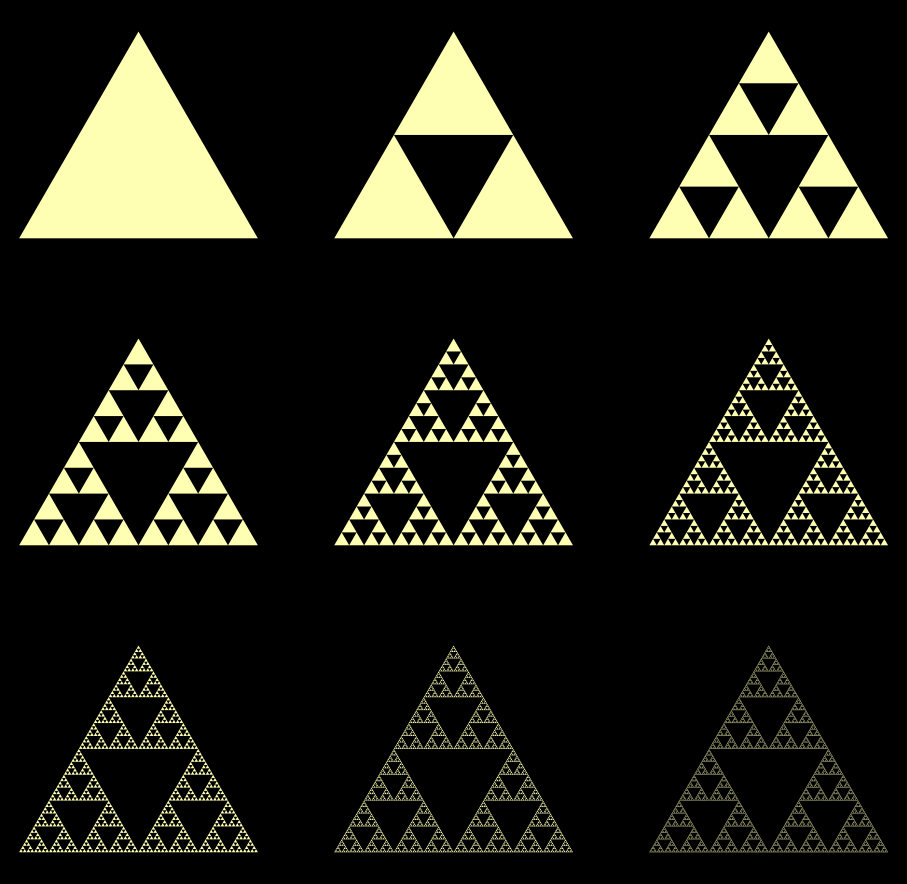

In [7]:
plt.figure(figsize=(16, 16))
for iters in range(9):
    x, y = sierpinski_triangle(iters)
    plt.subplot(3, 3, iters + 1)
    plt.fill(x,y)
    plt.axis('equal')
    plt.axis('off')
# plt.savefig('sierpinski-curve.svg')
plt.show()

In [8]:
def flowsnake(iters):
    axiom = "FX"
    rules = {"X":"X+YF++YF-FX--FXFX-YF+", "Y":"-FX+YFYF++YF+FX--FX-Y"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) / 3**iters
    p = points[0]
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(60) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(60) * 1j)
    x, y = points.real, points.imag
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    return x - mean_x, y - mean_y

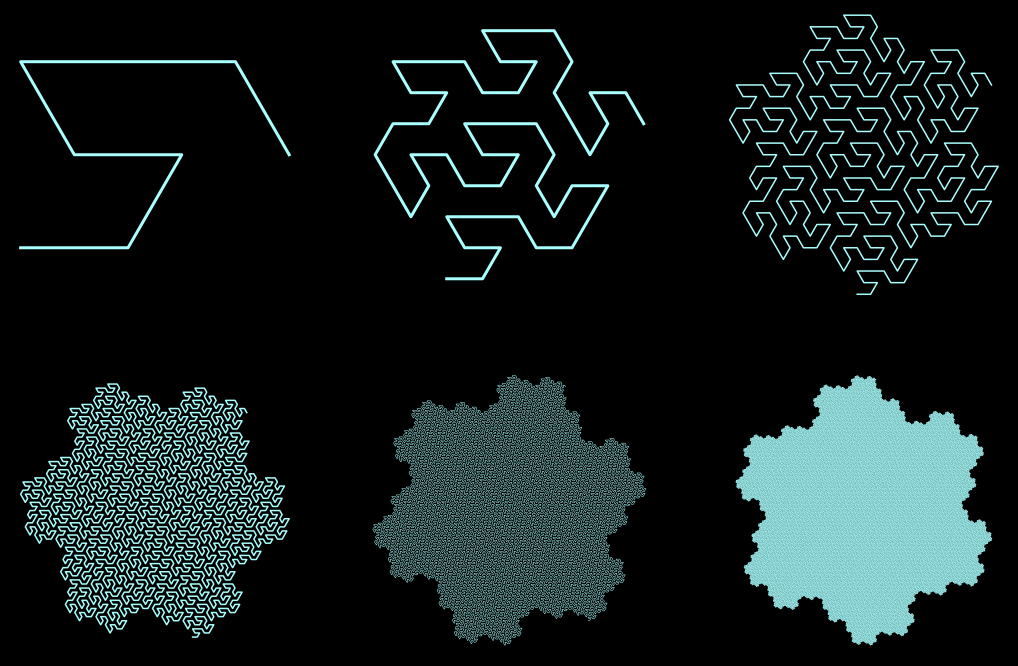

In [9]:
plt.figure(figsize=(18,12))
for iters in range(6):
    x, y = flowsnake(iters + 1)
    plt.subplot(2, 3, iters + 1)
    if iters < 2:
        plt.plot(x,y, color = '#aaffff', lw = 3)
    if iters < 4:
        plt.plot(x,y, color = '#aaffff')
    if iters > 3:
        plt.plot(x,y, color = '#aaffff', lw = 0.5)
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [10]:
def gosper_island(iters):
    axiom = "F+F+F+F+F+F"
    rules = {"F":"F+F-F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) /2 / 3**iters
    p = points[0]
    
    angle = 60
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    return x - mean_x, y - mean_y

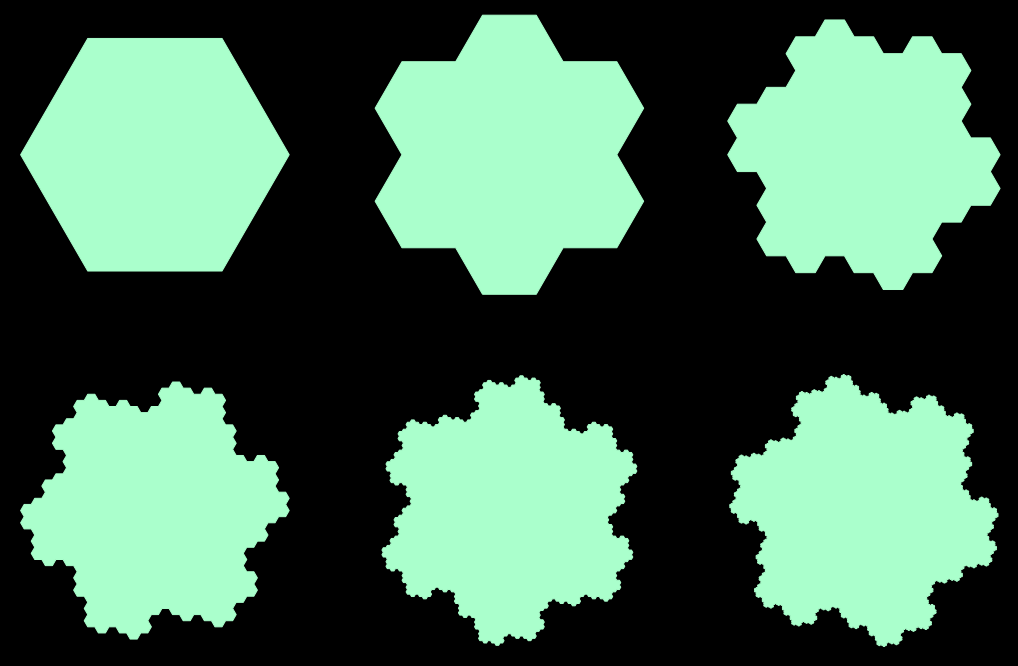

In [11]:
plt.figure(figsize=(18,12))
for iters in range(6):
    x, y = gosper_island(iters)
    plt.subplot(2, 3, iters + 1)
    plt.fill(x,y, color = '#aaffcc')
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [12]:
def pentaflake(iters):
    axiom = "F++F++F++F++F"
    rules = {"F":"F++F++F+++++F-F++F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) /2 / 3**iters
    p = points[0]
    
    angle = 36
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    return x - mean_x, y - mean_y

def pentaflake_hollow(iters):
    axiom = "X"
    rules = {"X":"YF-XF-YF-XF-Y", "Y":"XF+YF+XF+YF+X"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) /2 / 3**iters
    p = points[0]
    
    angle = 72
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    return x, y

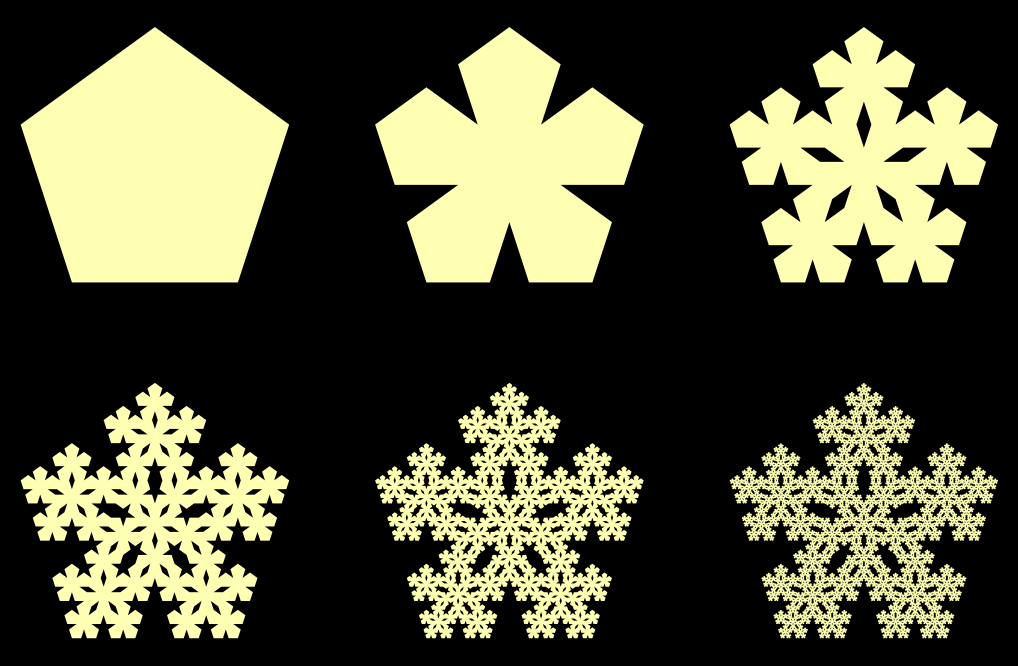

In [13]:
plt.figure(figsize=(18,12))
for iters in range(6):
    x, y = pentaflake(iters)
    plt.subplot(2, 3, iters + 1)
    plt.fill(x,y)
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [14]:
def quad_curve(iters, angle=90):
    axiom = "F"
    rules = {"F":"F+F-F-FF+F+F-F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) / (4)**iters
    p = points[0]
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    return x - mean_x, y - mean_y

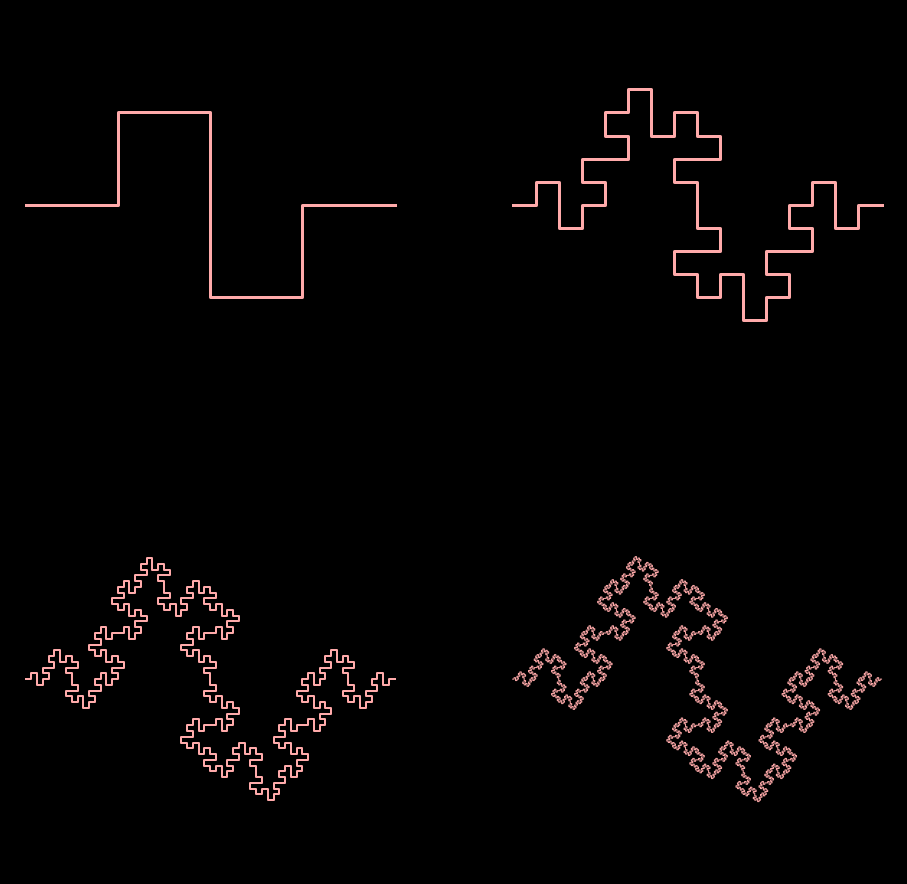

In [15]:
plt.figure(figsize=(16,16))
for iters in range(4):
    x, y = quad_curve(iters + 1)
    plt.subplot(2, 2, iters + 1)
    if iters + 1 <= 2:
        plt.plot(x,y, color = '#ffaaaa', lw = 3)
    if iters + 1 == 3:
        plt.plot(x,y, color = '#ffaaaa', lw = 2)
    else:
        plt.plot(x,y, color = '#ffaaaa', lw = 1)
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [16]:
def koch_curve(iters, angle=60):
    axiom = "F"
    rules = {"F":"F+F--F+F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) / 3**iters
    p = points[0]
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
#    mean_x = sum(x)/len(x)
#    mean_y = sum(y)/len(y)
    return x, y

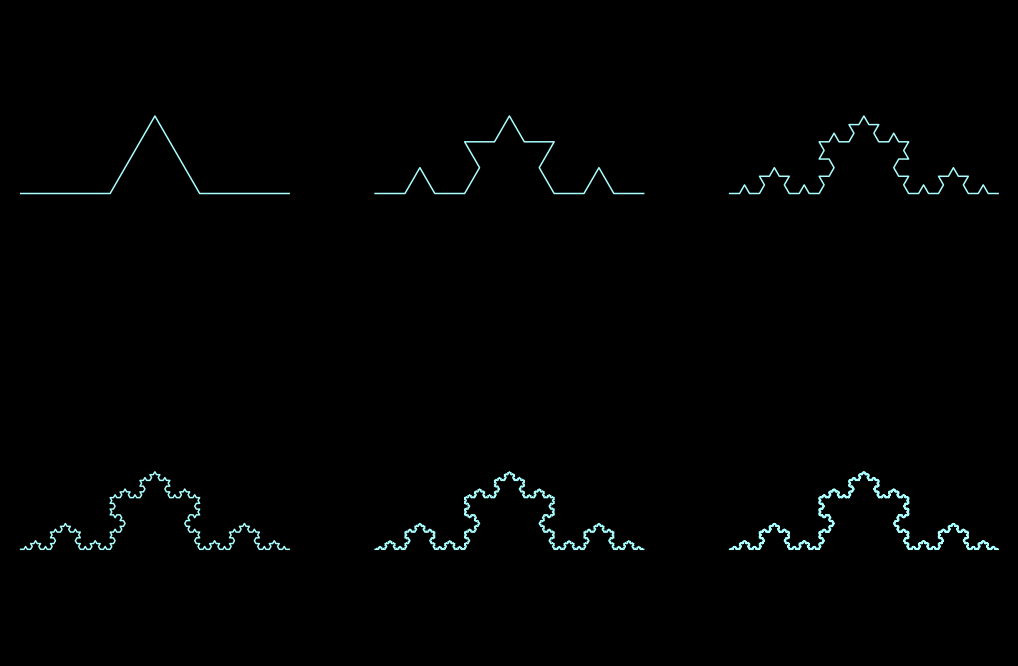

In [17]:
plt.figure(figsize=(18,12))
for iters in range(6):
    x, y = koch_curve(iters + 1)
    plt.subplot(2, 3, iters + 1)
    plt.plot(x,y, color = '#aaffff')
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [18]:
def koch_snowflake(iters):
    axiom = "+F--F--F"
    rules = {"F":"F+F--F+F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) / 3**iters
    p = points[0]
    
    angle=60
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
#    mean_x = sum(x)/len(x)
#    mean_y = sum(y)/len(y)
    return x, y

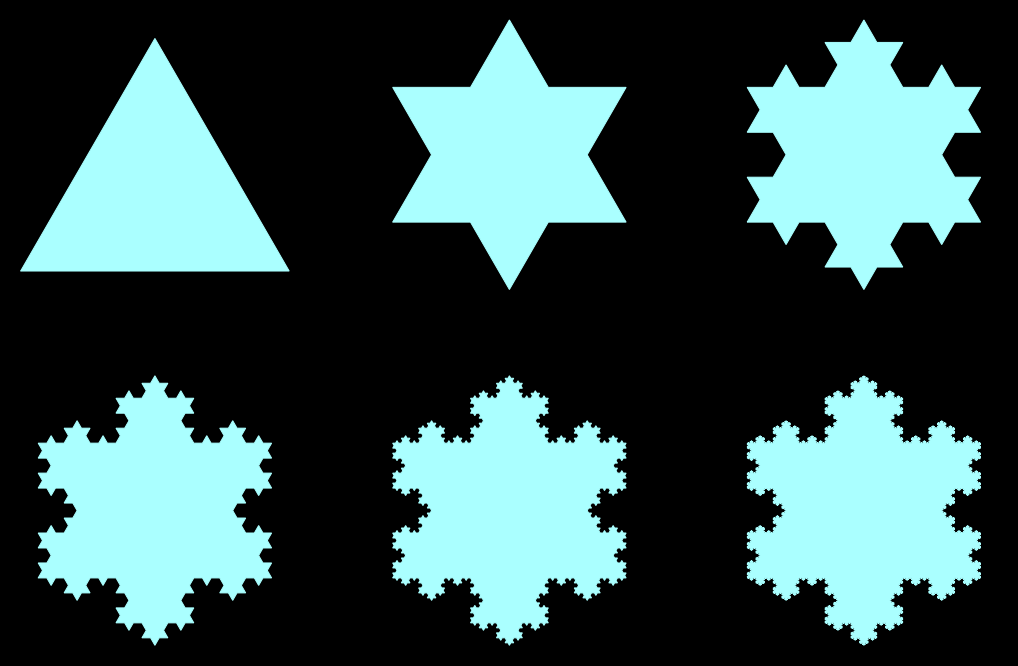

In [19]:
plt.figure(figsize=(18,12))
for iters in range(6):
    x, y = koch_snowflake(iters)
    plt.subplot(2, 3, iters + 1)
    plt.fill(x,y, color = '#aaffff')
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [20]:
def koch_island(iters, angle=90):
    axiom = "F+F+F+F"
    rules = {"F":"F+F-F-FF+F+F-F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j)# / (1 + 5**iters)
    p = points[0]
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    scale = max(x) - min(x)
    x = x/scale
    y = y/scale
    return x, y

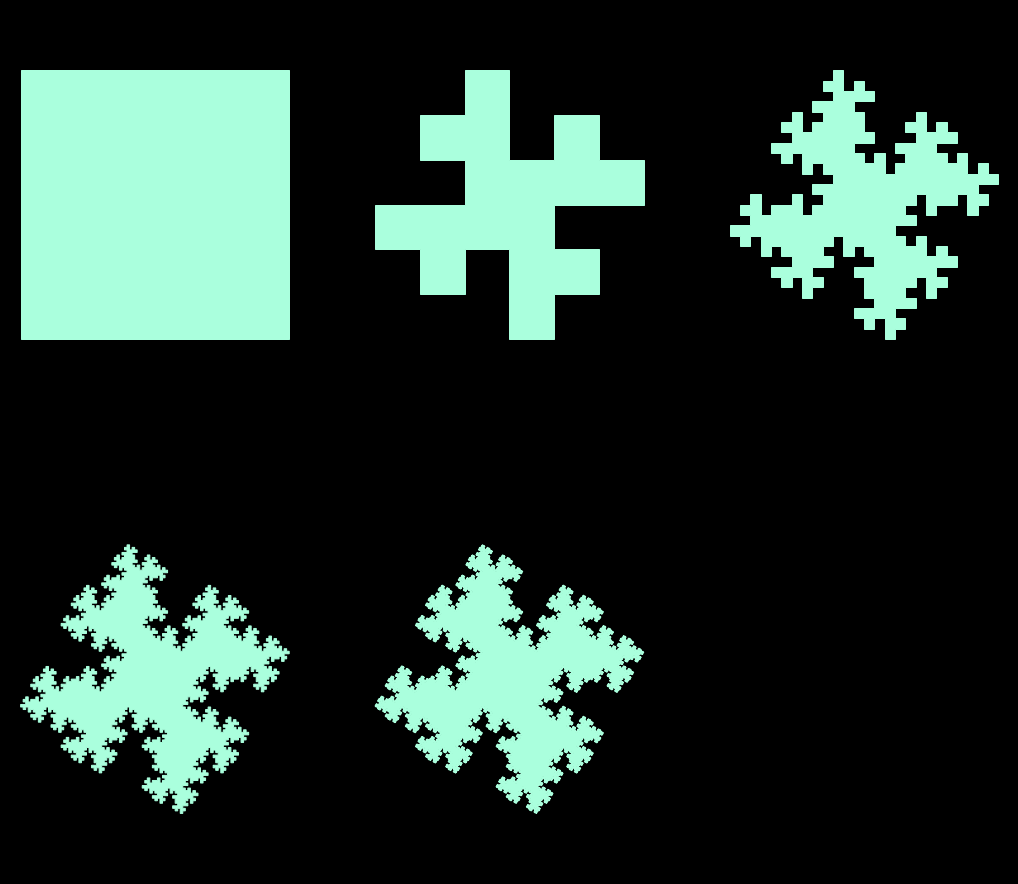

In [21]:
plt.figure(figsize=(18,16))
for iters in range(5):
    x, y = koch_island(iters)
    plt.subplot(2, 3, iters + 1)
    plt.fill(x,y, color = '#aaffdd')
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [22]:
def quad_island(iters, angle=90):
    axiom = "F+F+F+F"
    rules = {"F":"F+F-F"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j)# / (1 + 5**iters)
    p = points[0]
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
    scale = max(x) - min(x)
    x = x/scale
    y = y/scale
    return x, y

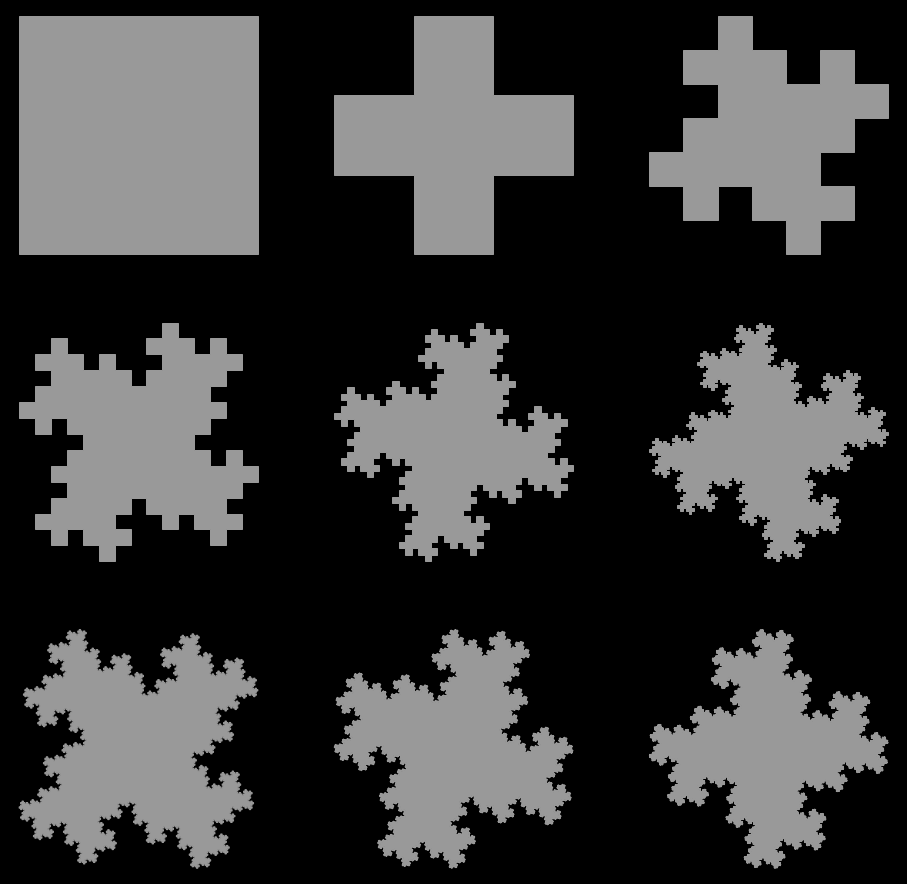

In [23]:
plt.figure(figsize=(16,16))
for iters in range(9):
    x, y = quad_island(iters)
    plt.subplot(3, 3, iters + 1)
    plt.fill(x,y, color = '0.6')
    plt.axis('equal')
    plt.axis('off')
plt.show()

In [24]:
def hilbert_curve(iters):
    axiom = "Y"
    rules = {"X":"-YF+XFX+FY-","Y":"+XF-YFY-FX+"}
    instructions = create_l_system(iters, axiom, rules)
    points = np.array([0.+0.j])
    dp = (1 + 0.j) / (2**iters - 1)
    p = points[0]
    angle = 90
    
    for cmd in instructions:
        if cmd == 'F':
            p = p + dp
            points = np.append(points, p)
        if cmd == '+':
            dp = dp * np.exp(np.deg2rad(angle) * 1j)
        if cmd == '-':
            dp = dp * np.exp(-np.deg2rad(angle) * 1j)
    x, y = points.real, points.imag
#    mean_x = sum(x)/len(x)
#    mean_y = sum(y)/len(y)
    return x-0.5, y-0.5

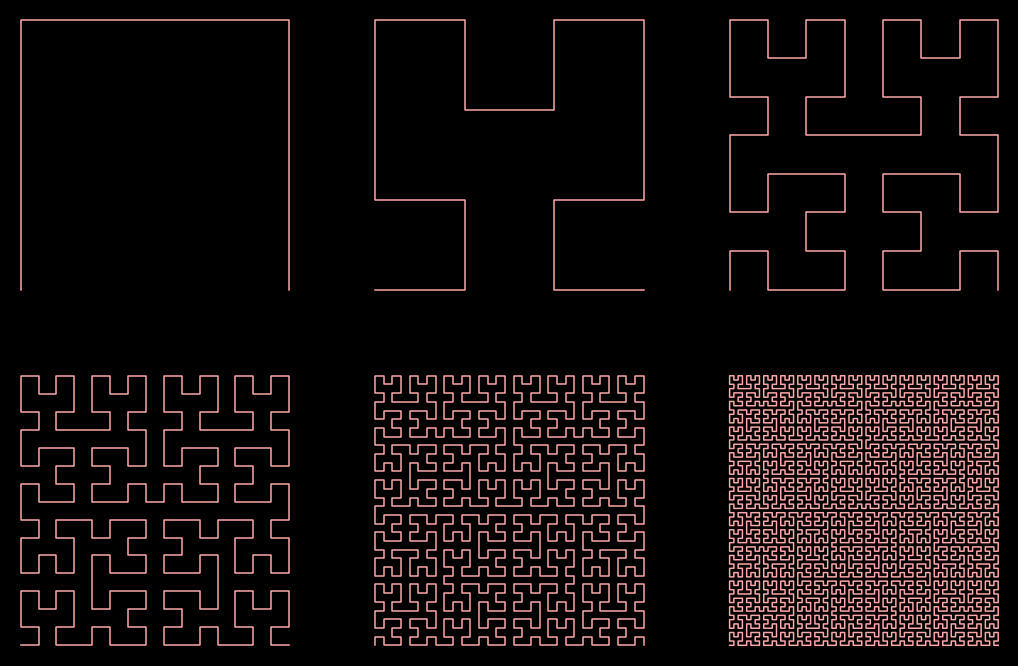

In [25]:
plt.figure(figsize=(18,12))
for iters in range(6):
    x, y = hilbert_curve(iters + 1)
    plt.subplot(2, 3, iters + 1)
    plt.plot(x,y, color = '#ffaaaa')
    plt.axis('equal')
    plt.axis('off')
plt.show()